In [102]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from copulas.multivariate import VineCopula
from copulas.bivariate import Gumbel
from copulas.bivariate import Clayton
from copulas.bivariate import Frank
import ppscore as ppss

In [103]:
path = "../Data/"

In [104]:
mean = pd.read_csv(path+'final_mean.csv')
mean.head()

,Unnamed: 0,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
0,4898,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
1,5162,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
2,3308,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
3,4263,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,338.585784,0
4,5168,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


<IPython.core.display.Javascript object>


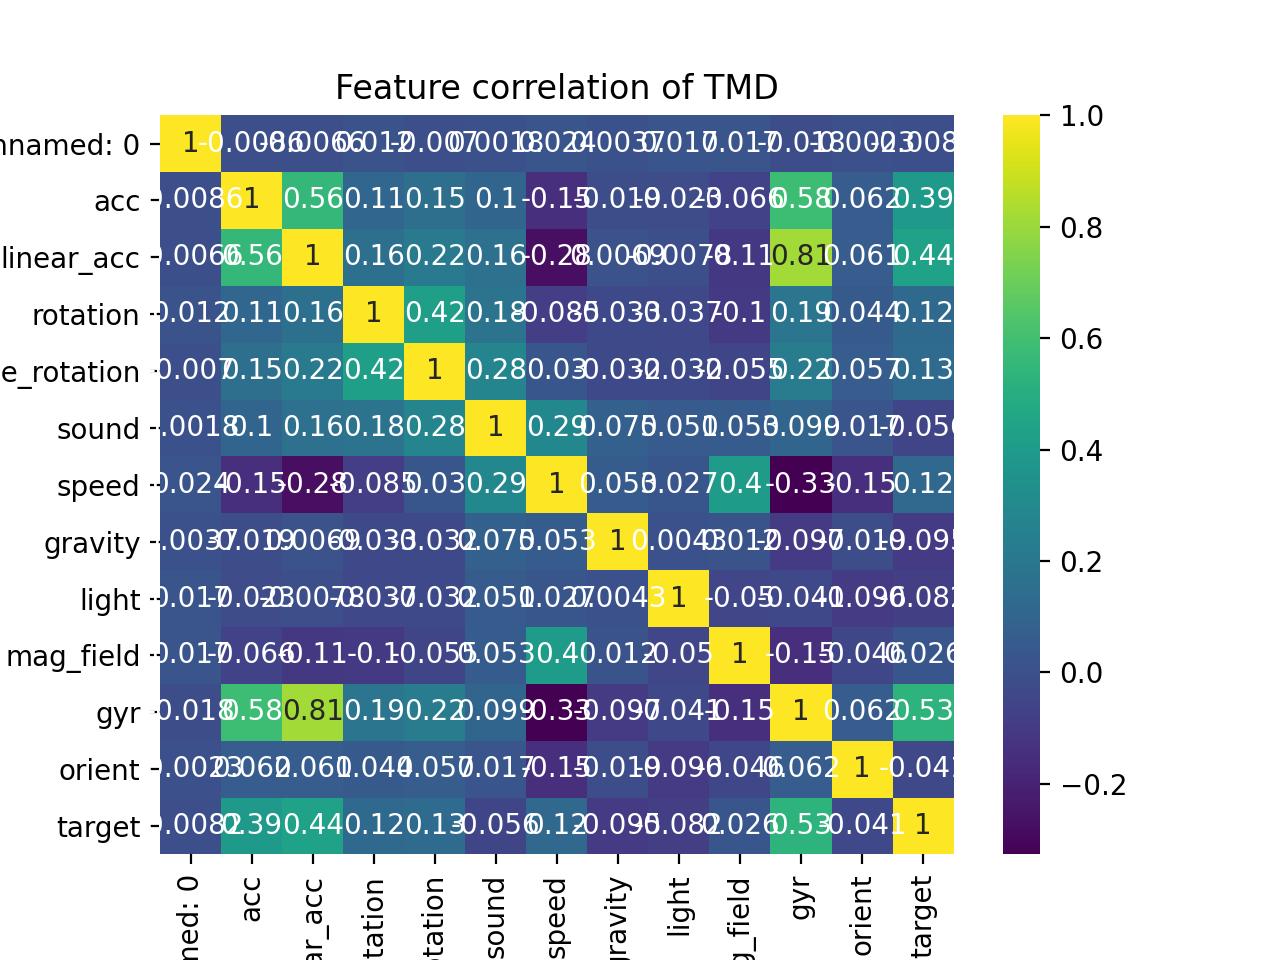

In [31]:
sns.heatmap(mean.corr(),annot=True,cmap='viridis')
plt.title("Feature correlation of TMD")
plt.show()

In [105]:
mean = mean.drop(["Unnamed: 0","acc","gravity","linear_acc","rotation","game_rotation"],axis=1)

In [106]:
label = mean['target']
label.values

array([0, 0, 0, ..., 4, 4, 4])

In [107]:
mean.columns

Index(['sound', 'speed', 'light', 'mag_field', 'gyr', 'orient', 'target'], dtype='object')

In [81]:
tri = pd.read_csv(path+'acc_linearacc_gyr.csv')
tri = tri.drop(["label"],axis=1)
tri.head()

,joint
0,0.014333
1,0.156630
2,3.435873
3,0.082801
4,3.696219


In [108]:
acc = pd.read_csv(path+'acc_frank.csv')
acc = acc.drop(["Unnamed: 0","target"],axis=1)
acc.head()

,fused_acc
0,1.320980
1,1.327584
2,1.299743
3,1.290305
4,1.289135


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


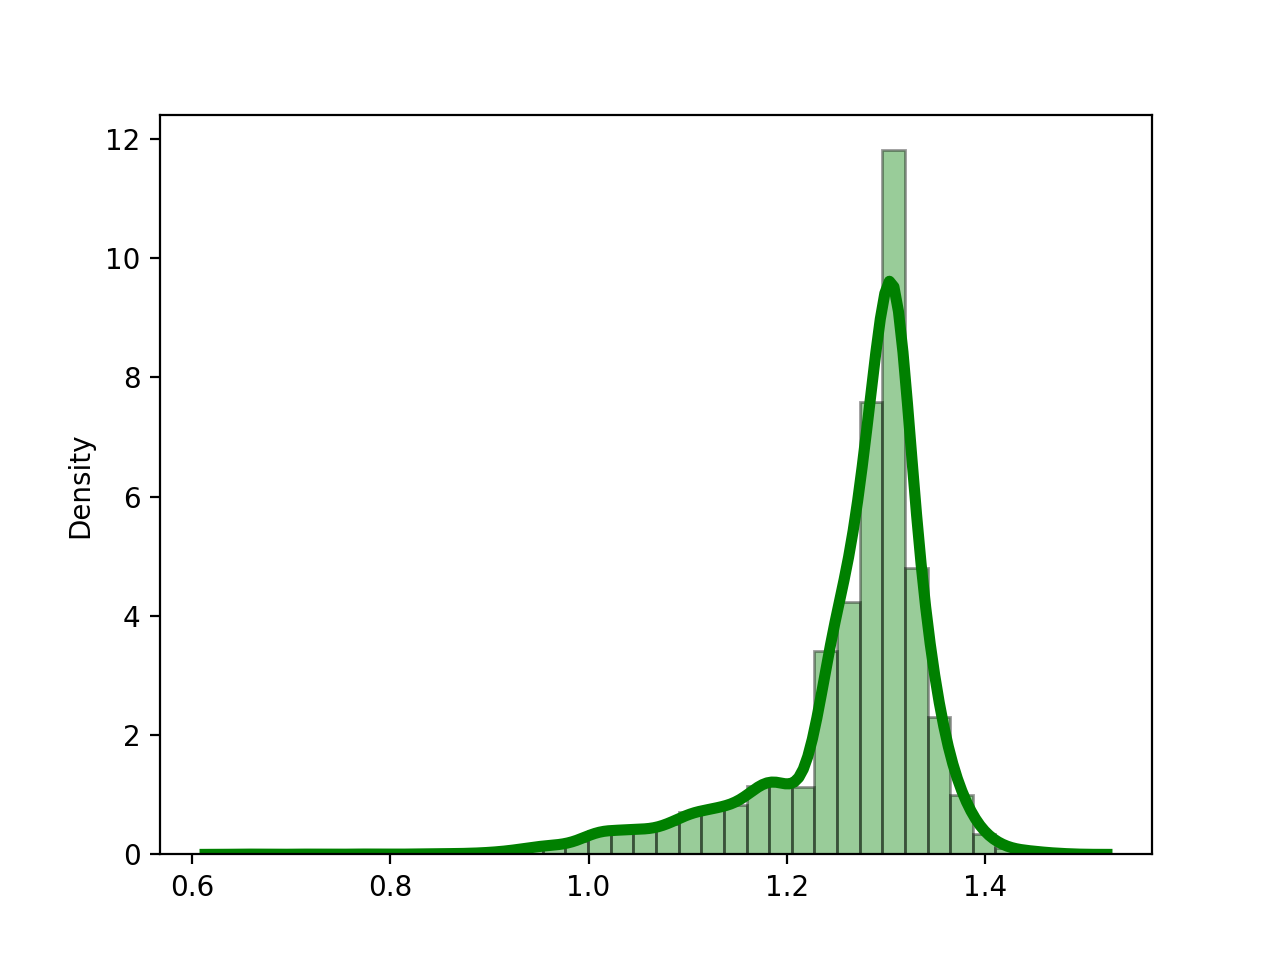

<AxesSubplot:ylabel='Density'>

In [125]:
sns.distplot(acc, norm_hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<IPython.core.display.Javascript object>


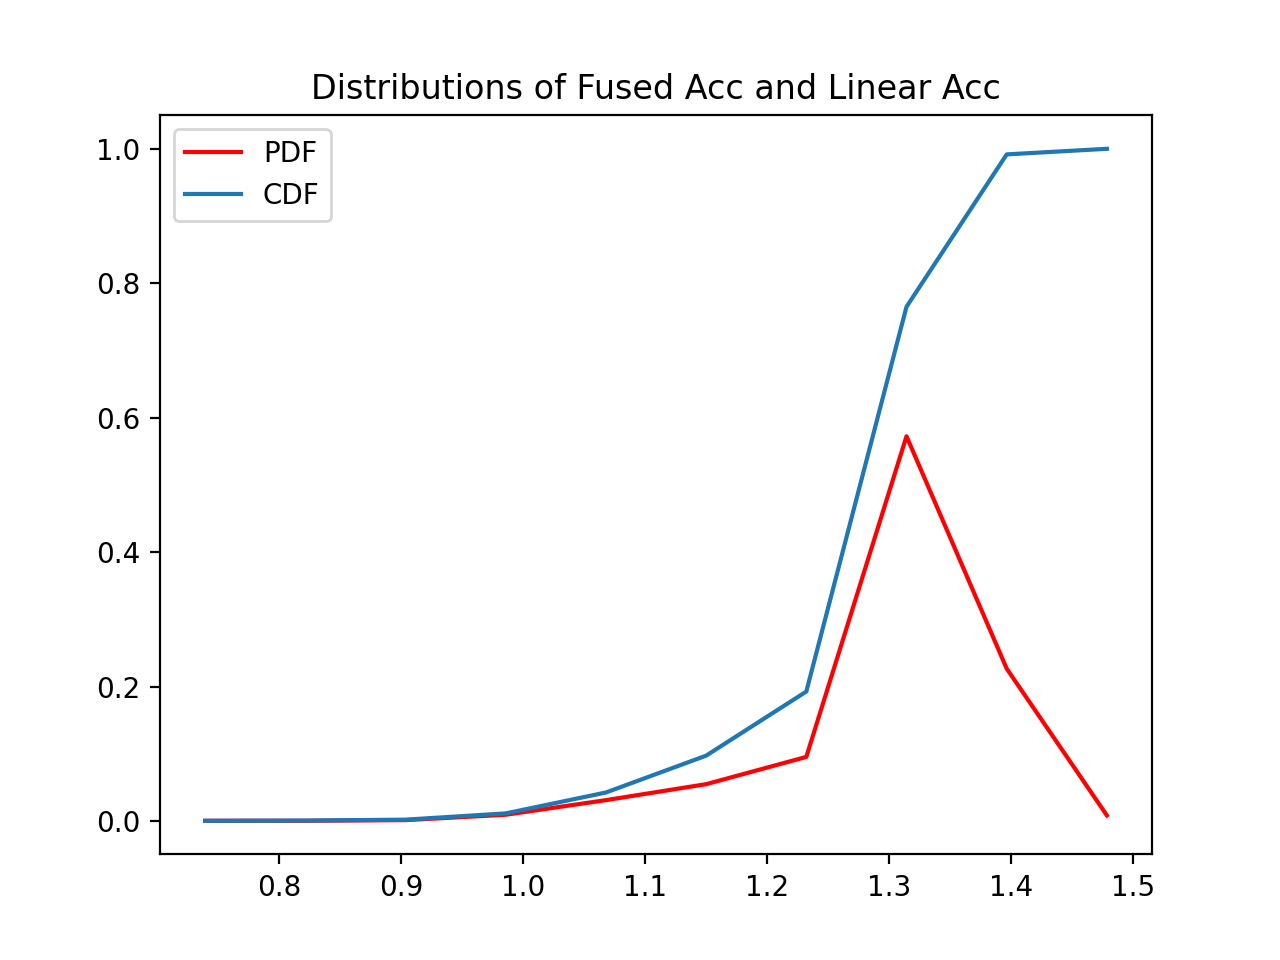

In [127]:
count, bins_count = np.histogram(acc, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Fused Acc and Linear Acc")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [109]:
mean["acc"] = acc["fused_acc"]

In [110]:
rot = pd.read_csv(path+'rot_frank.csv')
rot = rot.drop(["Unnamed: 0","target"],axis=1)
rot.head()

,fused_rot
0,1.261941
1,0.921476
2,1.322760
3,1.248091
4,1.342031


In [111]:
mean["rot"] = rot["fused_rot"]

In [85]:
non = pd.read_csv(path+'non_frank.csv')
non = non.drop(["Unnamed: 0","target","target_label"],axis=1)
non.head()

,fused
0,0.978356
1,0.934428
2,0.979786
3,0.996866
4,1.005438


In [86]:
mean["mag_orient"] = non["fused"]

In [112]:
mean = mean.drop(['target'],axis=1)

<IPython.core.display.Javascript object>


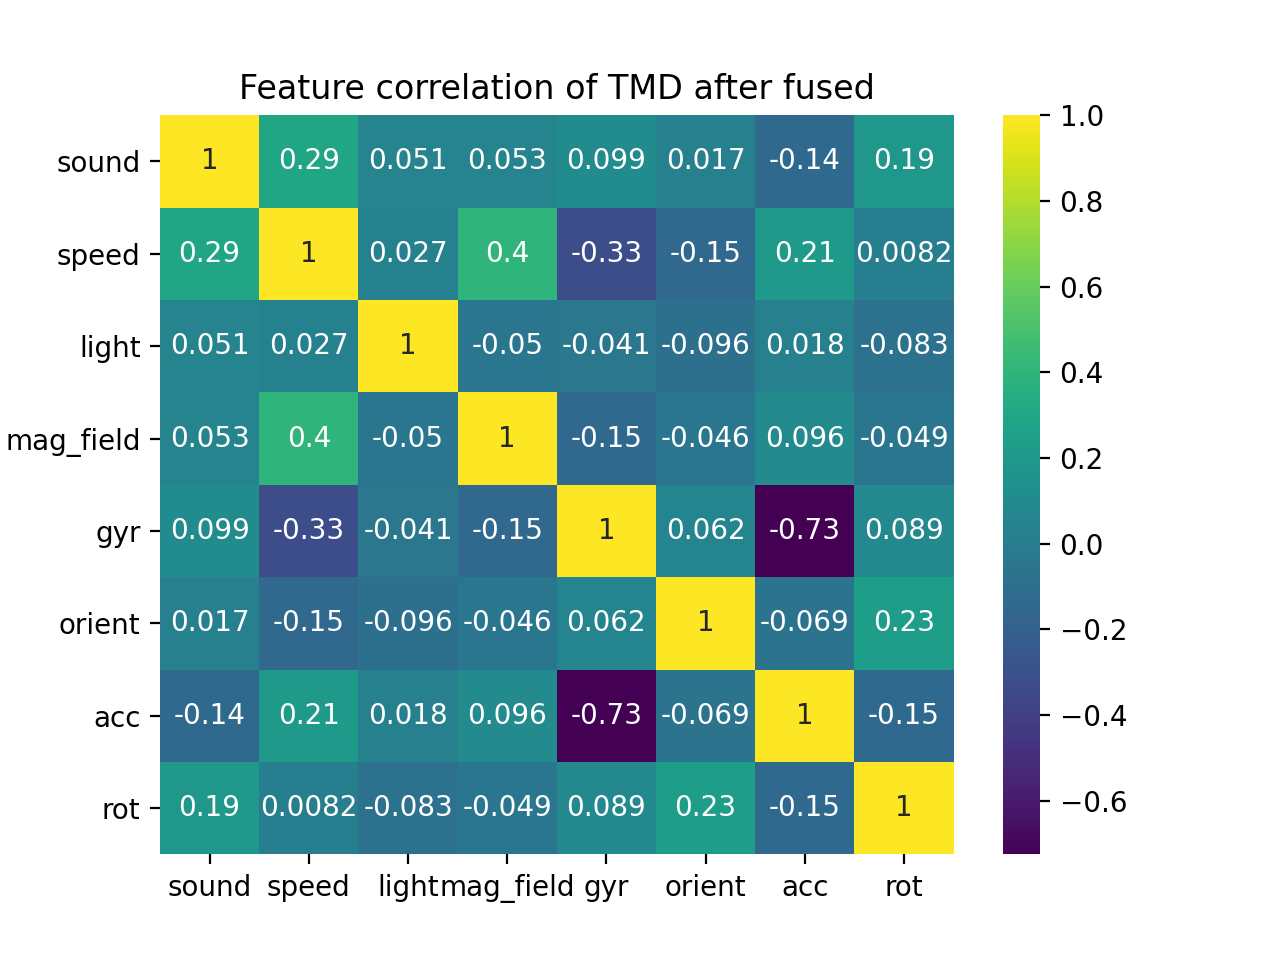

In [113]:
sns.heatmap(mean.corr(),annot=True,cmap='viridis')
plt.title("Feature correlation of TMD after fused")
plt.show()

In [21]:
target_label = []
for row in label:
        if(row == 0):
            target_label.append("a")
        elif(row == 1):
            target_label.append("b")
        elif(row == 2):
            target_label.append("c")
        elif(row == 3):
            target_label.append("d")
        elif(row == 4):
            target_label.append("e")
            
print(target_label)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',

In [114]:
X = mean.iloc[:,:].values
y = label.values

In [115]:
X

array([[ 88.94129917,  12.106335  ,   0.        , ..., 289.09800928,
          1.32097992,   1.26194097],
       [ 89.78031566,   6.75      ,   1.        , ..., 166.8145236 ,
          1.32758372,   0.9214758 ],
       [ 76.26457225,   9.091069  ,   0.        , ..., 292.81581533,
          1.2997431 ,   1.32276029],
       ...,
       [ 79.96022247,   1.0582143 ,   3.64285714, ..., 287.53058144,
          1.00286665,   1.70644307],
       [ 89.65489981,   1.5       ,   5.        , ..., 200.88750741,
          1.03254723,   1.4850413 ],
       [ 89.71244133,   0.75      , 135.15793271, ..., 260.71603997,
          1.11181853,   2.42986402]])

In [116]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [117]:
set(y)

{0, 1, 2, 3, 4}

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
y_pred  =  classifier.predict(X_test)

In [122]:
y_pred

array([4, 0, 0, ..., 4, 4, 4])

In [123]:
y_test

array([4, 0, 0, ..., 4, 4, 4])

In [124]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.9864291772688719

<IPython.core.display.Javascript object>


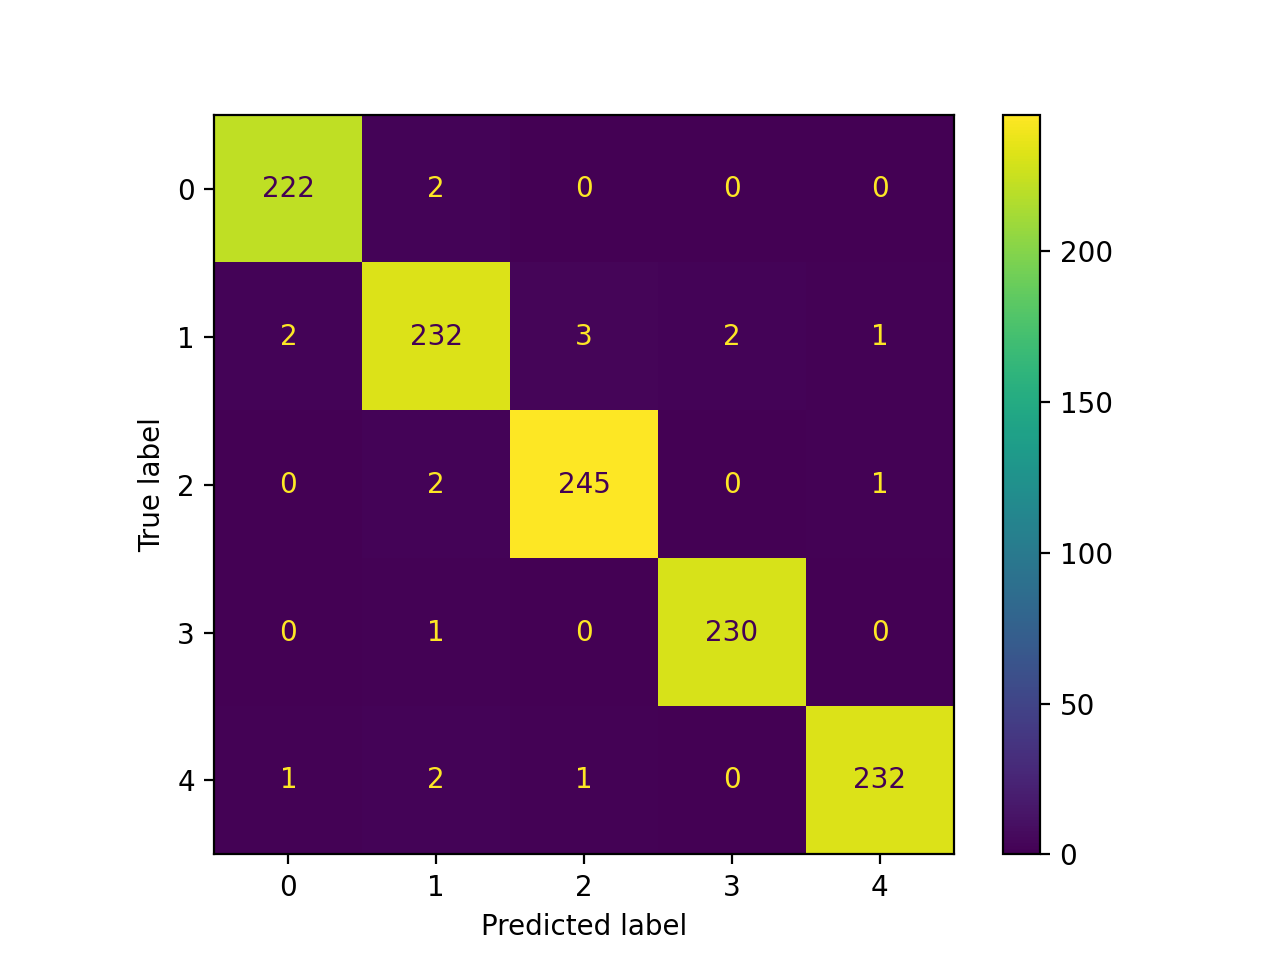

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  

In [101]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9848437912649874